<a href="https://colab.research.google.com/github/heegeunyoon/python101/blob/main/1_4_data_analysis_from_BIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 및 git repository 다운로드
![ ! -d python101 ] && git clone https://github.com/heegeunyoon/python101.git

# BIS

- visit BIS webpage (https://www.bis.org/statistics/dsr.htm?m=6_380_671)
- download Debt service ratios (whole data set) xlsx file

DSR 엑셀파일 구조
- Quarterly Series시트 입수
- 첫 3개 행을 제외 (그 다음 첫번째 행은 컬럼으로 자동 지정)
- 첫번째 열을 인덱스로 지정

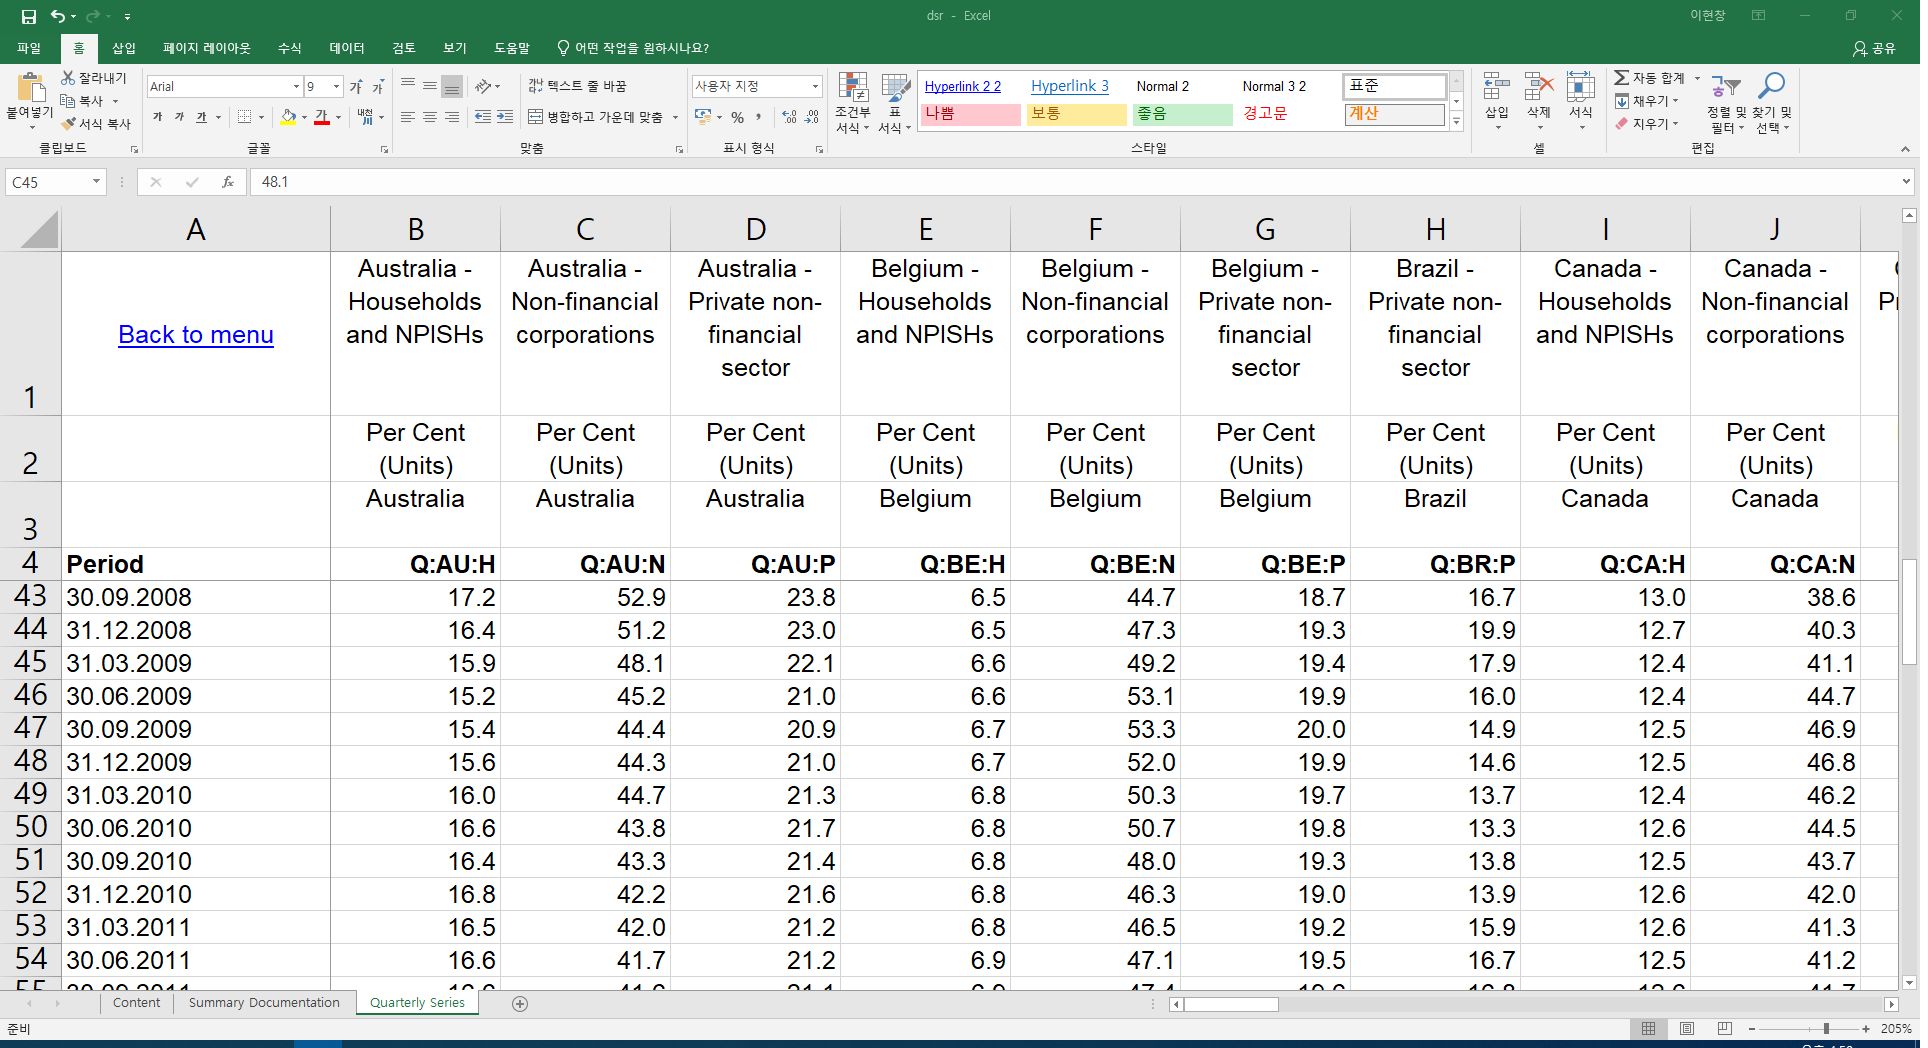

In [3]:
from IPython.display import Image
Image('python101/input/dsr_xlsx.png', width=1000)

DSR 엑셀파일 다운로드
- Quarterly Series시트 입수 (sheet_name='Quarterly Series')
- 첫 3개 행을 제외 (그 다음 첫번째 행은 컬럼으로 자동 지정) (skiprows=3)
- 첫번째 열을 인덱스로 지정 (index_col=0)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('python101/input/dsr.xlsx',sheet_name='Quarterly Series', skiprows=3, index_col=0)

In [ ]:
df

In [ ]:
df.head(10)

In [ ]:
df.tail(10)

데이터 구조 설정

- 각 칼럼 라벨을 ':'으로 나누어 멀티인덱스로 지정 df.columns.str.split(':').tolist()
- 칼럼 첫번째 레벨은 모두 분기를 나타내는 Q이므로 제거


In [ ]:
df.columns.str.split(':').tolist()

라벨이 주어진 형태에 따라 멀티인덱스 생성 함수를 선택

- from_tuples() : [['16', '미국'], ['16', '한국'], ['17', '미국'], ['17', '한국']]
- from_product() : [['16', '17'], ['미국', '한국']]
- from_arrays() : [['16', '16', '17', '17'], ['미국', '한국', '미국', '한국']]

In [ ]:
df.columns = pd.MultiIndex.from_tuples(df.columns.str.split(':').tolist())

In [ ]:
df

In [ ]:
df.columns.get_level_values(0).unique()

In [ ]:
df.columns.get_level_values(1).unique()

In [ ]:
df.columns.get_level_values(2).unique()

In [ ]:
df = df.droplevel(0, axis = 1) # df['Q']

In [ ]:
df

각 부문(민간, 비금융기업, 가계)에 대한 국가별 DSR 수준을 확인하기 쉽도록 칼럼 레벨 순서를 변경

- df.reorder_levels()

In [ ]:
df.reorder_levels([1, 0], axis = 1)

칼럼을 부문 - 국가 순서로 정렬 sort_index(axis=1)

In [ ]:
df.reorder_levels([1, 0], axis = 1).sort_index(axis=1)

데이터 자료형을 확인

In [ ]:
df.info()

In [ ]:
df.tail()

그래프 그리기

- 한국의 부문별 DSR 추이
- 한국, 미국, 영국의 가계부문 DSR 추이 (idx = pd.IndexSlice 이용)
- 2010년 이후 추이 (.loc['2010':, ])

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))


df['KR'].plot(ax = ax[0])
df.loc[:, ['KR', 'US', 'GB']].plot(ax = ax[1])
df.reorder_levels([1, 0], axis = 1)['H'].loc['2010':, ['KR', 'US', 'GB']].plot(ax = ax[2])

그래프 꾸미기
- python2021/script 폴더에서 RGB 값들이 리스트로 저장된 colors.py 파일 실행
    - lcolors, bcolors
- 색 지정, 범례, 그리드, 타이틀, 마커 등

In [ ]:
%run python101/script/colors.py

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))


df['KR'].plot(ax = ax[0], color=lcolors[:3])
df.loc[:, ['KR', 'US', 'GB']].plot(ax = ax[1], color=lcolors[:3], marker='o')
df.reorder_levels([1, 0], axis = 1)['H'].loc[:, ['KR', 'US', 'GB']].plot(ax = ax[2], lw=3, color=lcolors[:3])

ax[2].legend(ncol=3, frameon=False, fontsize=12)
ax[2].set_title('household DSR', fontsize=16, y=1.1)

연도별 그래프 그리기

- 평균, 연말, moving average

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

df_h = df.reorder_levels([1, 0], axis = 1)['H'].loc[:, ['KR', 'US', 'GB']]
df_h.index.names = [None]

df_h.resample('A').mean().plot(ax = ax[0], lw=3, color=lcolors[:3])
df_h.resample('A').last().plot(ax = ax[1], lw=3, color=lcolors[:3])
df_h.rolling(4, center=False).mean().plot(ax = ax[2], lw=3, color=lcolors[:3])

for i, t in enumerate(['연평균', '연말', '이동평균(직전 4분기)']):
    ax[i].set_title(t)
    ax[i].legend(frameon=False)
